<a href="https://colab.research.google.com/github/abhi-shek-solanki/air_bnb_data/blob/main/yes_bank_stock_analysis_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-7b6d7a1a7ed7>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [11]:
# Load Dataset
# lets load our dataset

file_path = "/content/data_YesBank_StockPrices.csv"
data = pd.read_csv(file_path)

In [12]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:

from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))


data.set_index('Date', inplace=True)

In [14]:
data.head()
# now correct date format to analys the price

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


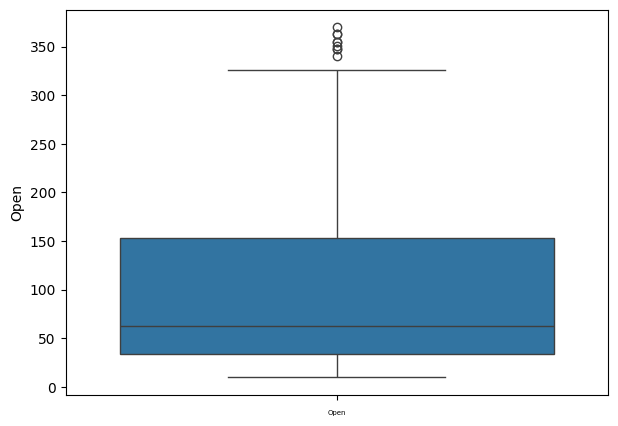

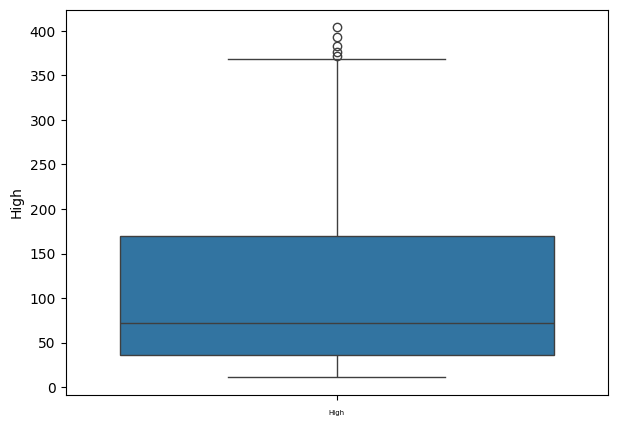

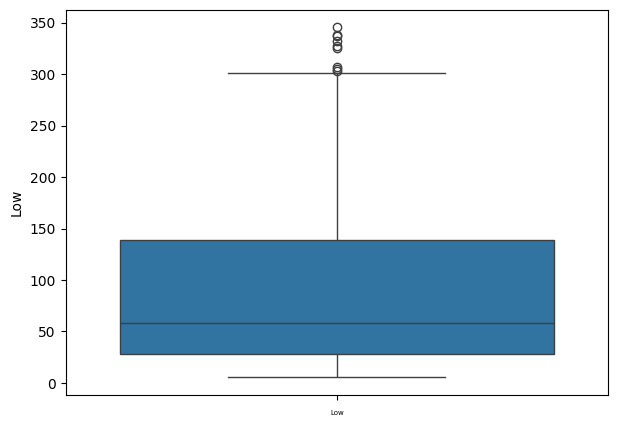

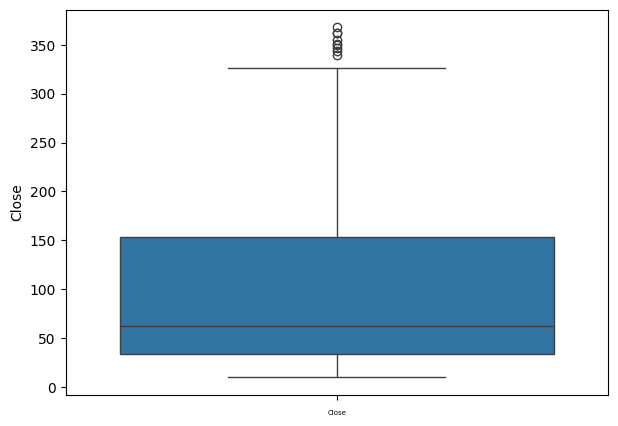

In [15]:
for col in data.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(data[col])
  plt.xlabel(col, fontsize=5)
  plt.show()


In [16]:
# cheking dependent and independent variable

independent = data.columns.tolist()[:-1]
dependent = ['Close']

Dependent ploting

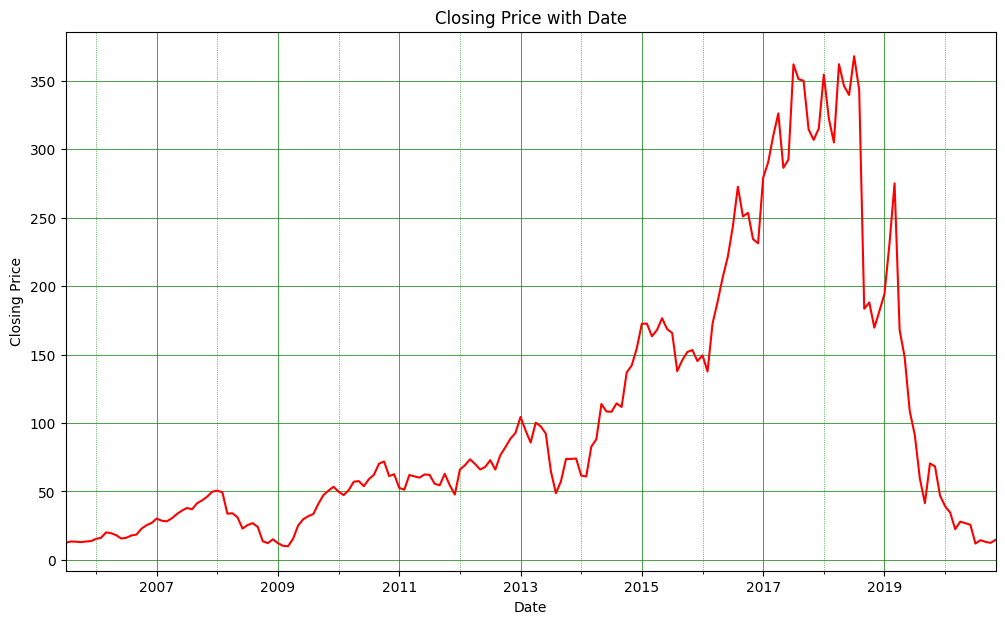

In [17]:
plt.figure(figsize=(12,7))
data['Close'].plot(color = 'r')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

as we can see the graph is increasing from 2009 till 2018 than it is decreasing

Independent ploting

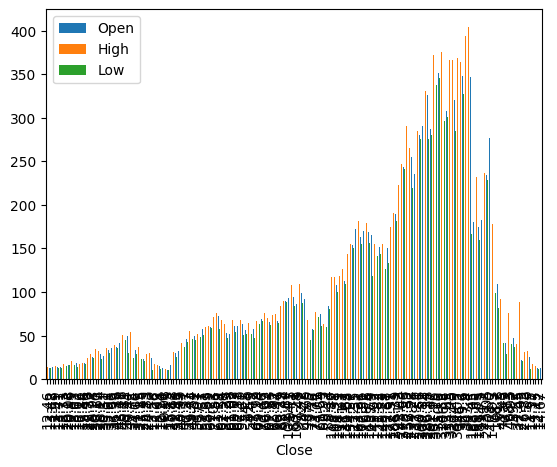

In [18]:
data.plot(x="Close", y=["Open","High", "Low"], kind="bar")
plt.rcParams['figure.figsize'] = (200, 8)

It shows the relation between opening closing high and close prioc

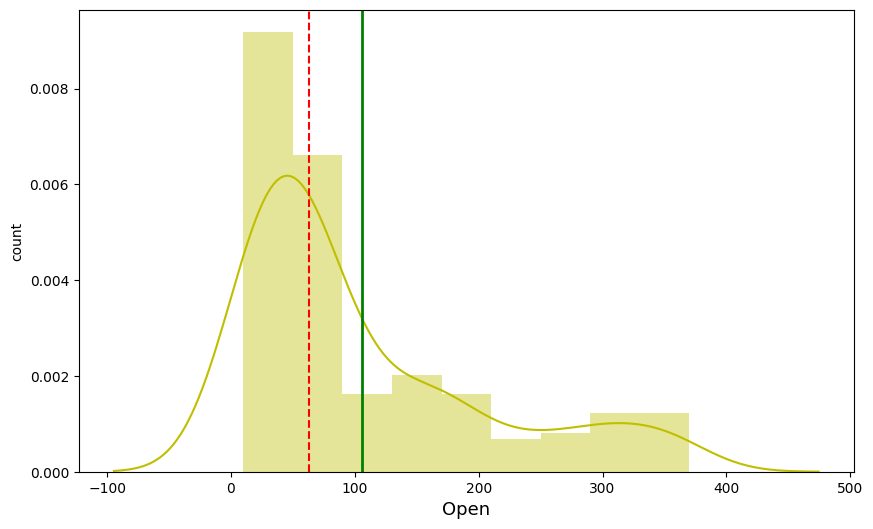

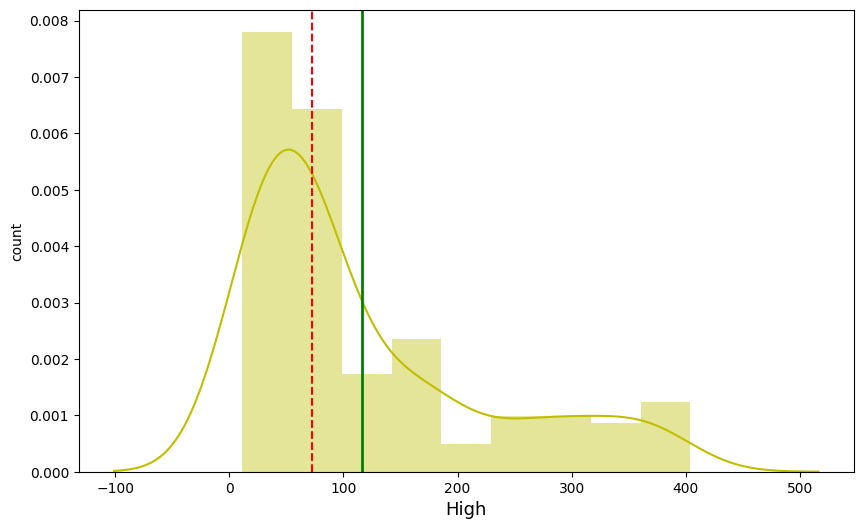

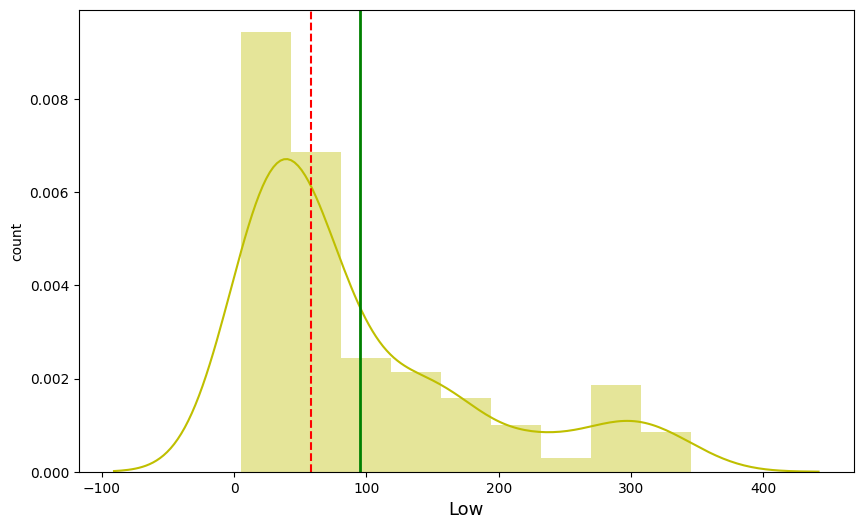

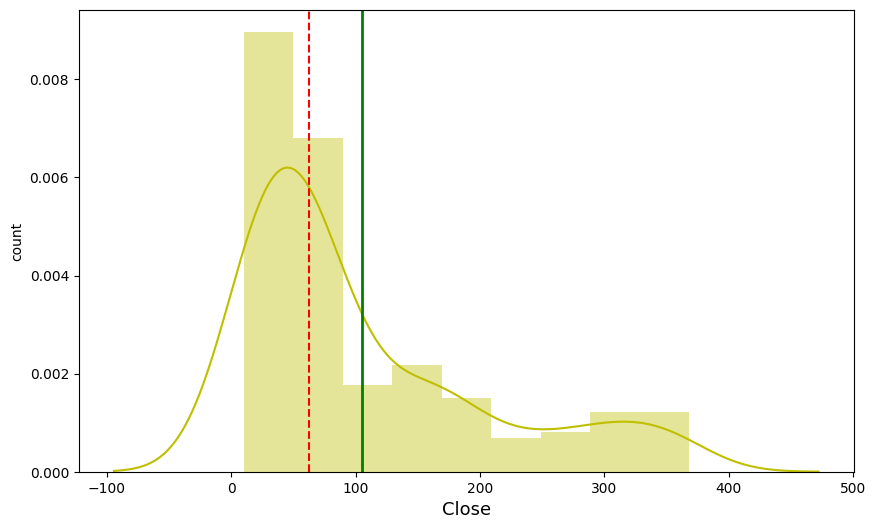

In [19]:
# Plotting the distributions of all features.
for col in data.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(data[col], color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(data[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case).
  plt.axvline(data[col].median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

our data is positivelyi skewed we need to normalize it using log

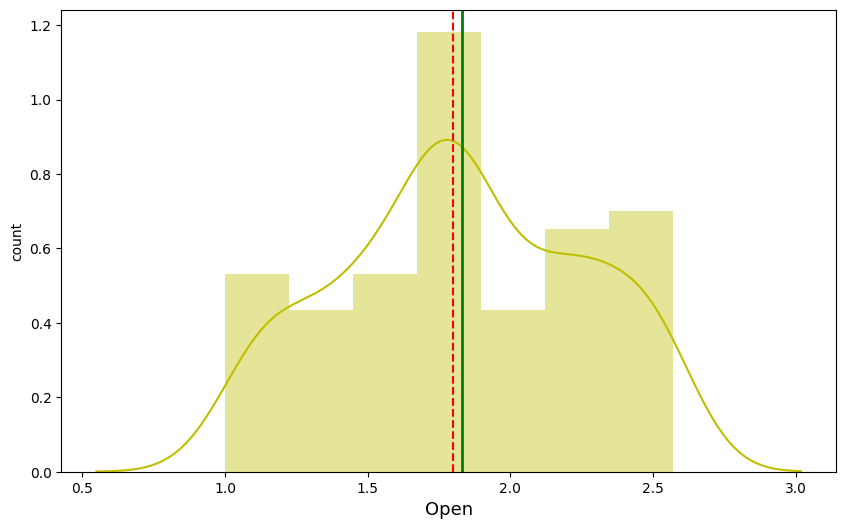

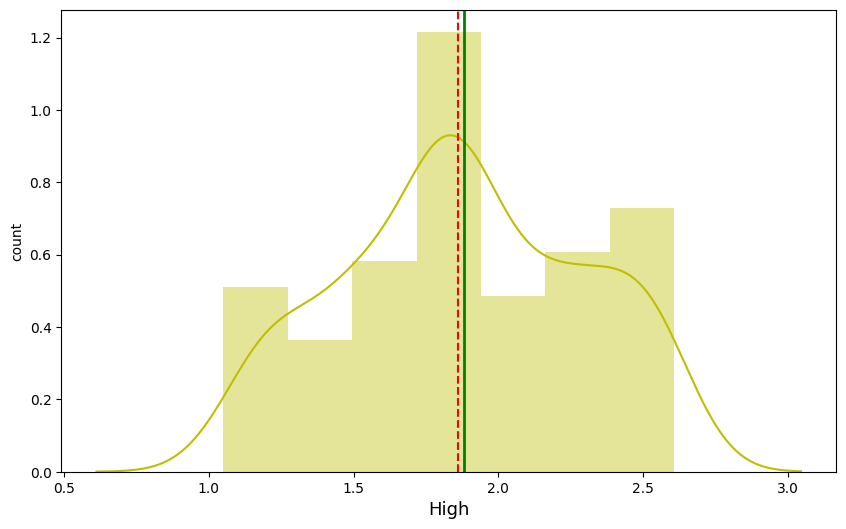

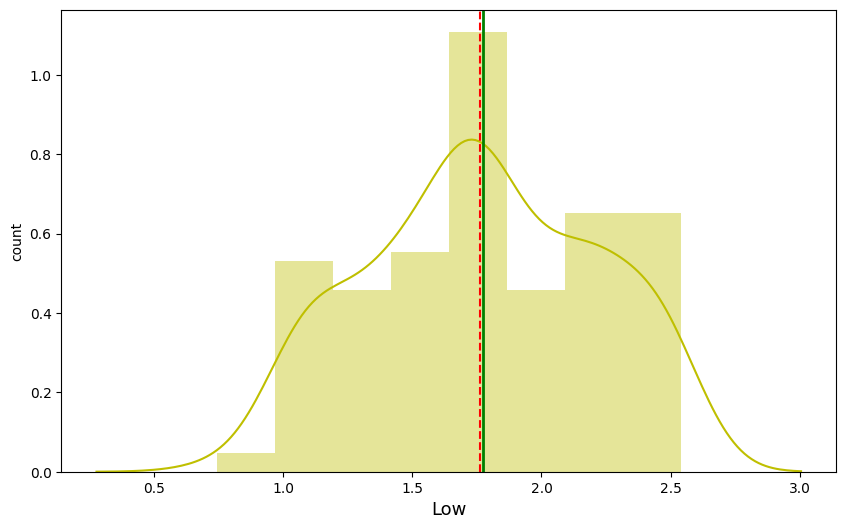

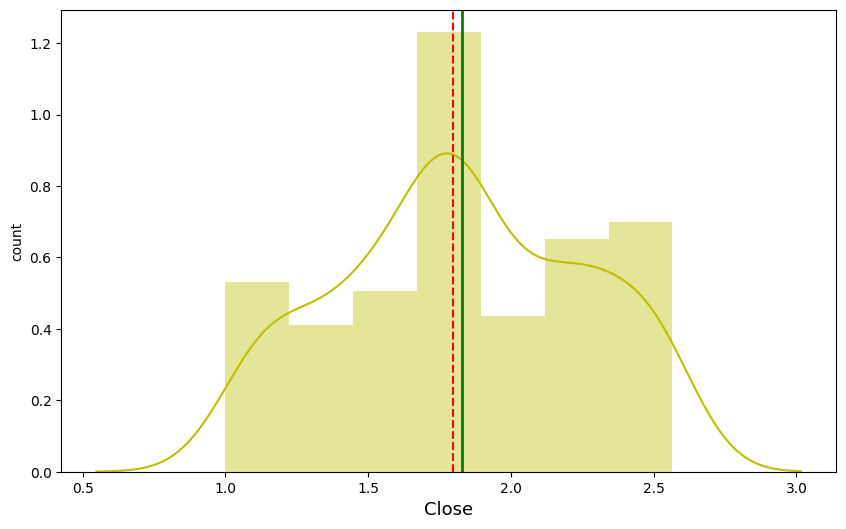

In [20]:
# Lets use log transformation on these features using np.log() and plot them.
for col in data.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(np.log10(data[col]), color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(np.log10(data[col]).mean(),color='green',linewidth=2)
  plt.axvline(np.log10(data[col]).median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

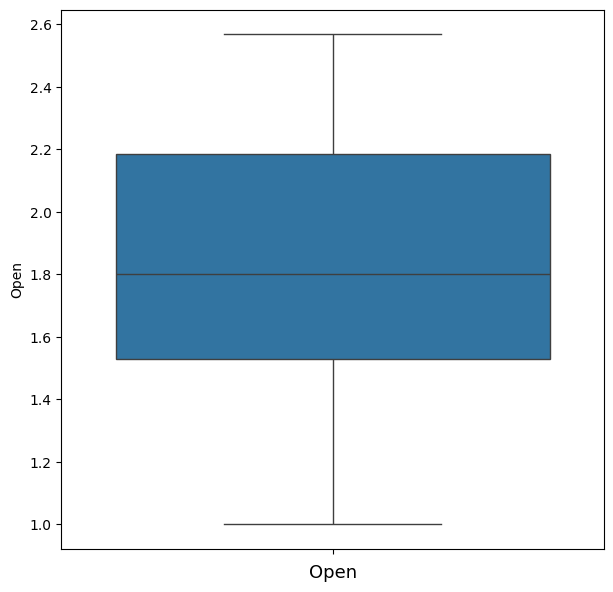

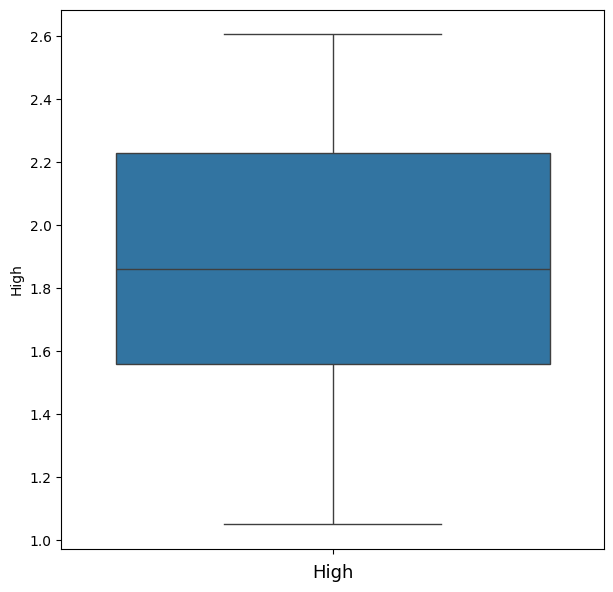

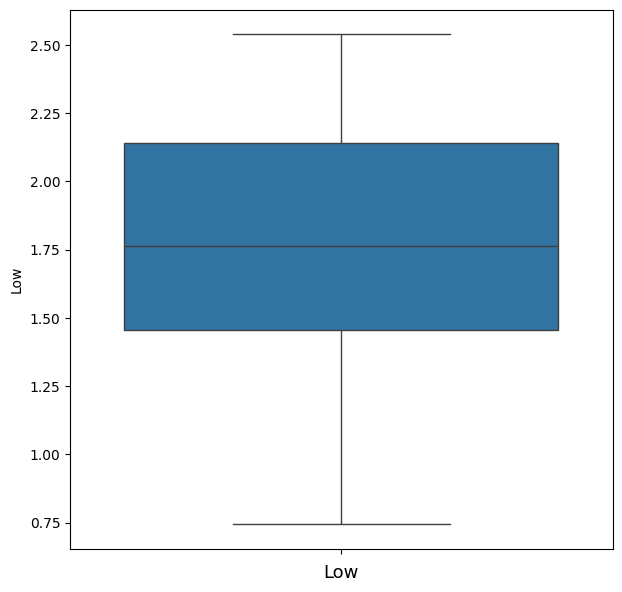

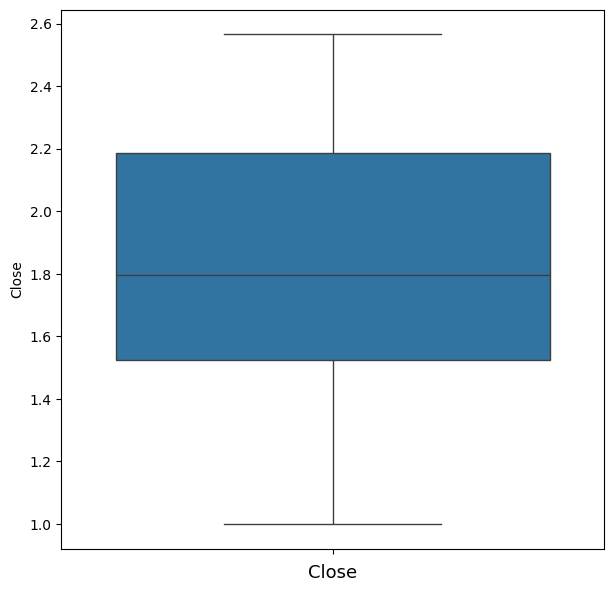

In [21]:
#now cheking for outliers after normalizing the data no outliers are there#

for col in data.columns:
  plt.figure(figsize=(7,7))
  sns.boxplot(np.log10(data[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

<Axes: >

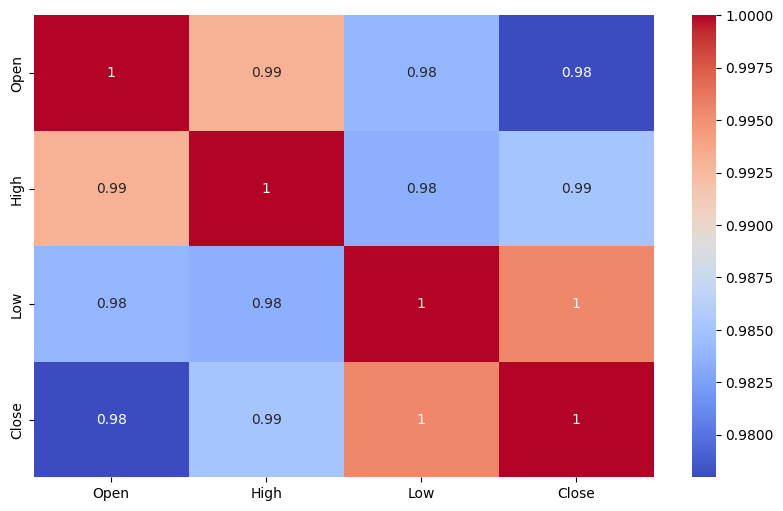

In [22]:
# lets co relate our data

corr = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

there is high co relation between all the columns

In [23]:
# As there is high co relation between columns we use vif


from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



In [24]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


as all the values are so much high and only 3 independeny columns so colinearti should be unavoidable here

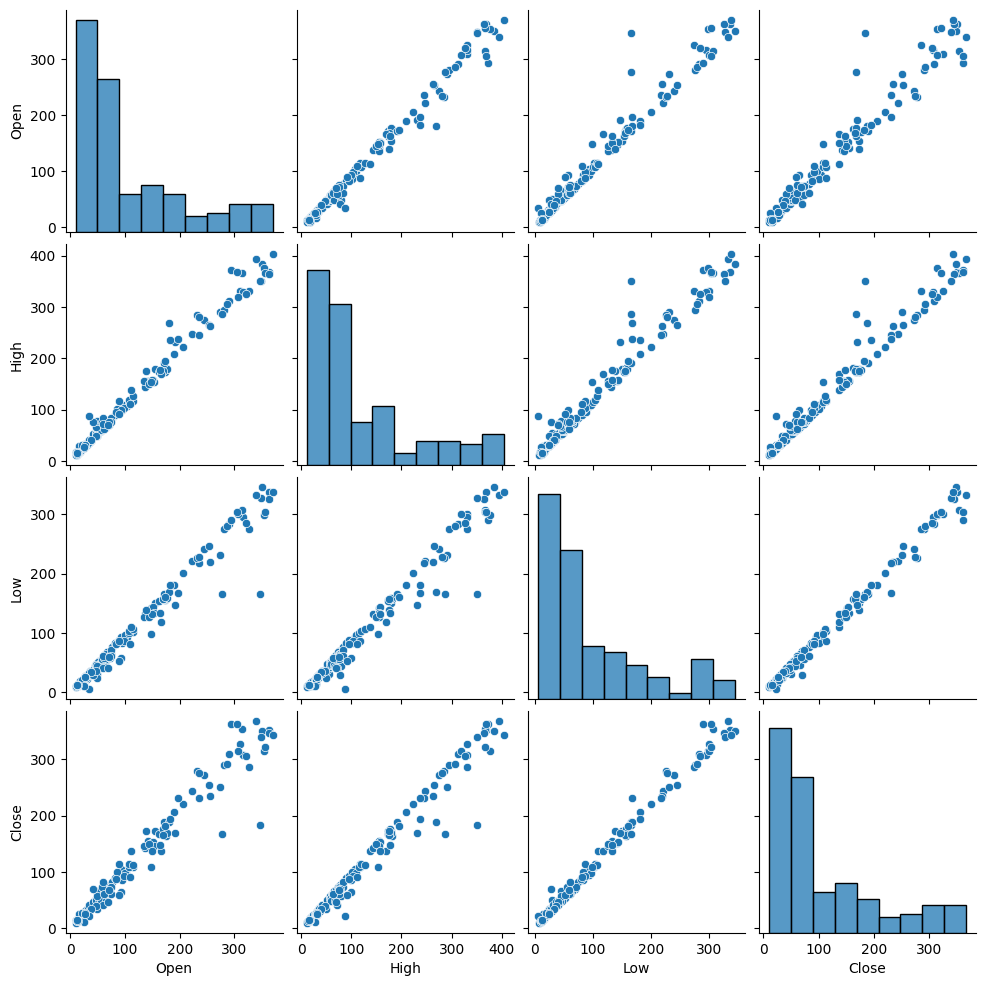

In [25]:
# now cheking the relation between each graph

# cheking realtion between

import seaborn as sns

sns.pairplot(data)

In [26]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
X = data[independent].values
# Create the dependent variable data
y = data[dependent].values



In [27]:
# splitting the data into a train and a test set. we do this using train test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[ 32.05041945]
 [141.39404628]
 [ 44.6186774 ]
 [142.1847688 ]
 [ 67.10693606]
 [ 32.62047222]
 [232.84048635]
 [ 18.11837716]
 [ 15.39523209]
 [214.31677099]
 [300.57479208]
 [ 87.42383581]
 [154.01722588]
 [ 59.84864685]
 [342.68198056]
 [260.7391185 ]
 [ 74.67777157]
 [ 28.85960368]
 [260.75411505]
 [ 51.64750396]
 [ 10.53811057]
 [118.55620032]
 [147.10778122]
 [ 59.92309426]
 [218.04859715]
 [ 47.9878126 ]
 [250.16672269]
 [ 15.07529924]
 [108.6874867 ]
 [ 53.2946785 ]
 [368.83014088]
 [339.95761347]
 [ 73.72840345]
 [167.96544878]
 [ 40.15717944]
 [ 48.9966109 ]
 [262.36562296]]


In [31]:
print(regressor.coef_)

[[-0.4404148   0.46406454  1.0142898 ]]


In [32]:
print(regressor.intercept_)

[1.44956834]


In [33]:
r2_score(y_test,y_pred)

0.9930815866308079